# **1.- Determinación de variables clínicas y biomédicas más relevantes**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Cargar el dataset
file_path = '../data/processed/df_cancer_prostata_processed.csv'
df = pd.read_csv(file_path)


In [ ]:

df['FEC_NACIMIENTO'] = pd.to_datetime(df['FEC_NACIMIENTO'] , format='%Y-%m-%d',errors='coerce')
df['FECHA_INICIO_1'] = pd.to_datetime(df['FECHA_INICIO_1'], format='%Y-%m-%d',errors='coerce')
df['FECHA_INICIO_2'] = pd.to_datetime(df['FECHA_INICIO_2'], format='%Y-%m-%d',errors='coerce')
df['FECHA_TERMINO_1'] = pd.to_datetime(df['FECHA_TERMINO_1'], format='%Y-%m-%d',errors='coerce')
df['FECHA_TERMINO_2'] = pd.to_datetime(df['FECHA_TERMINO_2'], format='%Y-%m-%d',errors='coerce')
df['FECHA_COMITE'] = pd.to_datetime(df['FECHA_COMITE'], format='%Y-%m-%d',errors='coerce')
df['FEC_DIAGNO'] = pd.to_datetime(df['FEC_DIAGNO'], format='%Y-%m-%d',errors='coerce')
df['FEC_TOM_MUESTRA'] = pd.to_datetime(df['FEC_TOM_MUESTRA'], format='%Y-%m-%d',errors='coerce')

# Mostrar las primeras filas y un resumen de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 70 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   IDPACIENTE                     2644 non-null   int64         
 1   IDTUMOR                        2644 non-null   int64         
 2   SEXO                           2644 non-null   object        
 3   FEC_NACIMIENTO                 2644 non-null   datetime64[ns]
 4   PREVISION                      2644 non-null   object        
 5   RELIGION1                      2644 non-null   object        
 6   ETNIA                          2644 non-null   object        
 7   ZONA_VIVIENDA                  2644 non-null   object        
 8   COMUNA                         2644 non-null   object        
 9   REGION                         2644 non-null   object        
 10  SSREFERENCIA                   2644 non-null   object        
 11  RECINTO_PROCEDE  

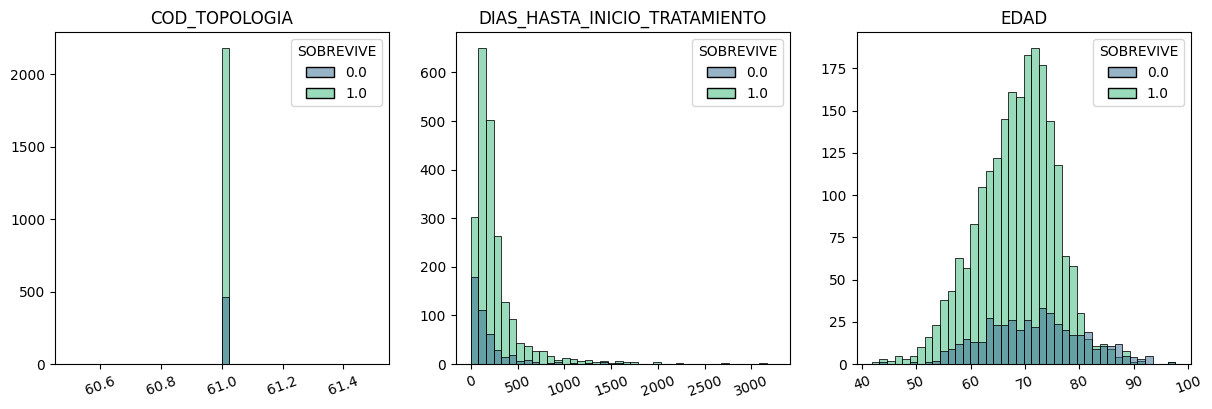

In [ ]:
# Calcular la edad en días
df['EDAD_EN_DIAS'] = (df['FEC_DIAGNO'] - df['FEC_NACIMIENTO']).dt.days

# Calcular la edad en años
df['EDAD'] = df['EDAD_EN_DIAS'] / 365.25

# Eliminar la columna de edad en días si no es necesaria
df = df.drop(columns=['EDAD_EN_DIAS'])

# Seleccionar las columnas deseadas
columnas_deseadas = ['COD_TOPOLOGIA','DIAS_HASTA_INICIO_TRATAMIENTO','EDAD']
df_nuevo = df[columnas_deseadas]
fig = plt.figure(figsize = (25, 25))

i = 1
for n in df_nuevo.columns:
    plt.subplot(5, 5, i)
    ax = sns.histplot(x = df[n], hue = df['SOBREVIVE'], palette = "viridis", bins = 40)
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(n), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

<class 'pandas.core.series.Series'>
RangeIndex: 2644 entries, 0 to 2643
Series name: SOBREVIVE
Non-Null Count  Dtype  
--------------  -----  
2644 non-null   float64
dtypes: float64(1)
memory usage: 20.8 KB
SOBREVIVE
1.0    2181
0.0     463
Name: count, dtype: int64


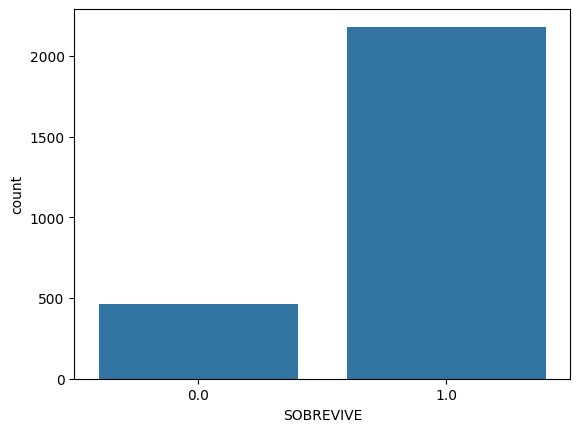

In [ ]:
df['SOBREVIVE'].info()

# Gráfico de resultado de la variable target (0: No Hipertensión; 1: Hipertensión)
import seaborn as sns
print(df['SOBREVIVE'].value_counts())
_ = sns.countplot(x='SOBREVIVE', data=df)